In [2]:
# imports, imports, imports
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [3]:
# load your data girl
df = pd.read_csv('/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/time_vs_RI_plots/DIP-HEMA_stat_AW_1-6.csv')

In [4]:
# interpolate data to common time points
common_time = np.linspace(min(df['time (min)'].min(), df['time (min).1'].min()), 
                          max(df['time (min)'].max(), df['time (min).1'].max()), 
                          len(df))  # Using the length of the dataframe for the number of points
dri_column_name = df.columns[3]
interpolated_LS = np.interp(common_time, df['time (min)'], df['LS'])
interpolated_dRI = np.interp(common_time, df['time (min).1'], df[dri_column_name])


In [10]:
# normalizing the data using shared
global_min = min(min(interpolated_LS), min(interpolated_dRI))
global_max = max(max(interpolated_LS), max(interpolated_dRI))

normalized_LS_shared = (interpolated_LS - global_min) / (global_max - global_min)
normalized_dRI_shared = (interpolated_dRI - global_min) / (global_max - global_min)

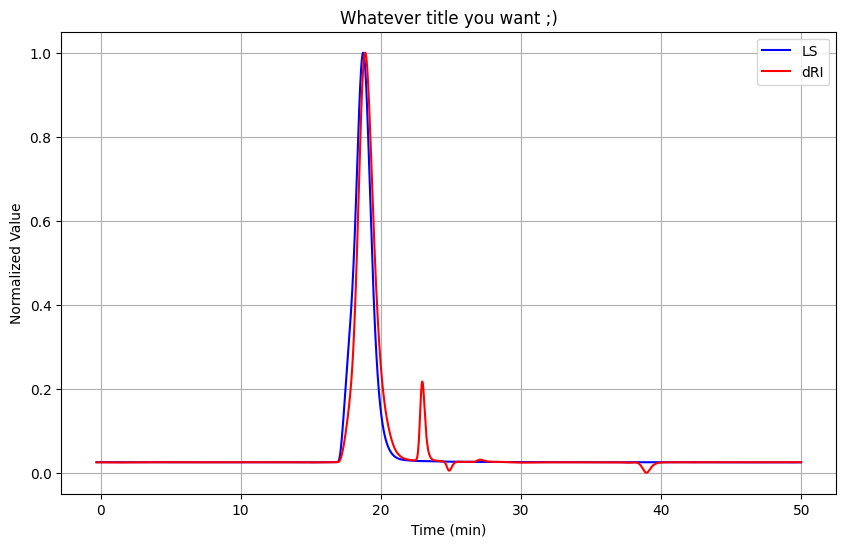

In [9]:
# plotting
plt.figure(figsize=(10, 6))
plt.plot(common_time, normalized_LS_shared, label="LS", color="blue")
plt.plot(common_time, normalized_dRI_shared, label="dRI", color="red")
plt.xlabel("Time (min)")
plt.ylabel("Normalized Value")
plt.legend()
plt.title("Whatever title you want ;)")
plt.grid(True)
plt.show()